In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.ndimage import uniform_filter1d

In [41]:
import glob
import json
import time
from datetime import datetime

In [42]:

intervals = glob.glob('./data/*')
intervals = sorted(intervals)

In [43]:
thorchain_gases = []
block_chair_cheetah_gases = []
axis_time = []
for interval_path in intervals:
  try:
    interval_json = open(interval_path, "r")
    interval_data = json.loads(interval_json.read())
    thorchain_inbounds = interval_data["thorchain"]
    block_chair_data = interval_data["block_chair"]["data"]
    if not block_chair_data["ethereum"]["data"]:
      continue
    for chain_data in thorchain_inbounds:
      if chain_data["chain"] == "ETH":
        block_chair_gas = block_chair_data["ethereum"]["data"]["suggested_transaction_fee_gwei_options"]["cheetah"]
        thorchain_gas = int(chain_data["gas_rate"])
        block_chair_cheetah_gases.append(block_chair_gas)
        thorchain_gases.append(thorchain_gas)
    time = datetime.fromtimestamp(int(interval_data['timestamp'])/1000)
    axis_time.append(time)
  except:
    print(f"Problem in parsing: {interval_path}")

thorchain_gases = np.array(thorchain_gases)
block_chair_cheetah_gases = np.array(block_chair_cheetah_gases)
gas_difference = np.subtract(thorchain_gases, block_chair_cheetah_gases)
axis_time = np.array(axis_time)


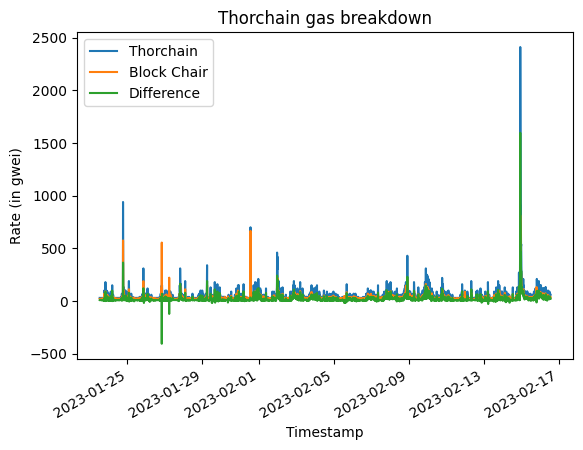

In [44]:
plt.plot(axis_time, thorchain_gases, axis_time, block_chair_cheetah_gases, axis_time, gas_difference)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Rate (in gwei)')
plt.title('Thorchain gas breakdown')
plt.legend(['Thorchain', 'Block Chair', 'Difference'])
plt.show()

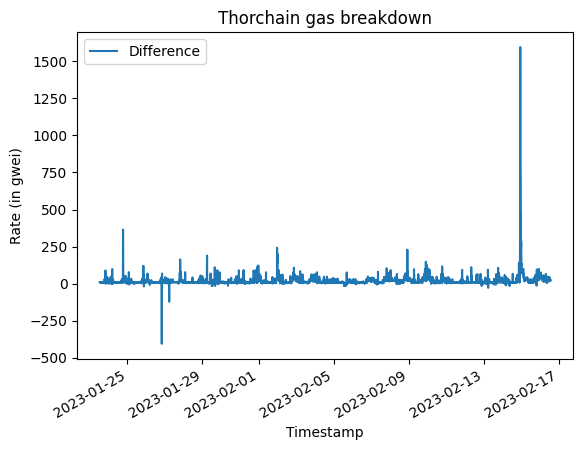

In [45]:
plt.plot(axis_time, gas_difference)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Rate (in gwei)')
plt.title('Thorchain gas breakdown')
plt.legend(['Difference'])
plt.show()

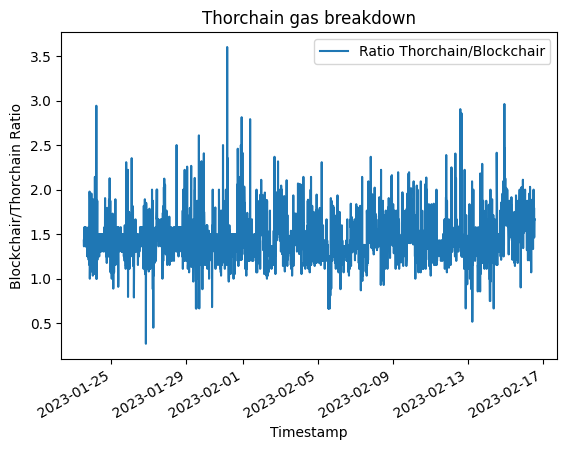

In [46]:
div = np.divide(thorchain_gases, block_chair_cheetah_gases)
plt.plot(axis_time, div)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Blockchair/Thorchain Ratio')
plt.title('Thorchain gas breakdown')
plt.legend(['Ratio Thorchain/Blockchair'])
plt.show()

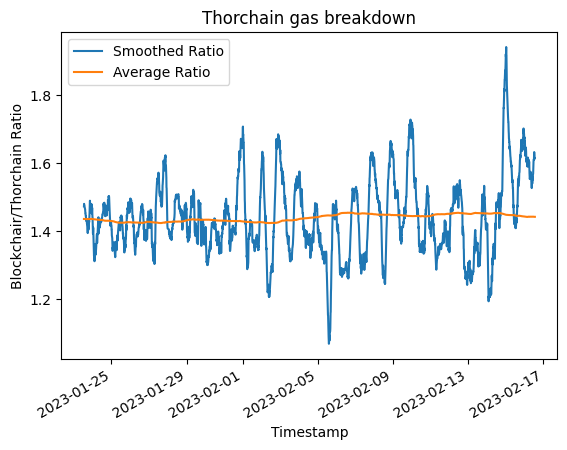

In [48]:
div = np.divide(thorchain_gases, block_chair_cheetah_gases)
uniform = uniform_filter1d(div, size=30)
avg = uniform_filter1d(div, size=div.shape[0])
plt.plot(axis_time, uniform, axis_time, avg)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Blockchair/Thorchain Ratio')
plt.title('Thorchain gas breakdown')
plt.legend(['Smoothed Ratio', 'Average Ratio'])
plt.show()